In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# %cd /content/drive/MyDrive/BINJKT/Semester_4/Model Deployment/UTS

In [3]:
import pandas as pd

# Load the data
data_path = 'data_B.csv'
data = pd.read_csv(data_path)

# Display the first few rows and some basic statistics
data_head = data.head()
data_description = data.describe()

(data_head, data_description)


(   Unnamed: 0      id  CustomerId     Surname  CreditScore Geography  Gender  \
 0           0   37969    15780804      Ugorji        850.0    France    Male   
 1           1  121427    15593974     Dickson        597.0   Germany    Male   
 2           2  151801    15655274        Teng        637.0   Germany    Male   
 3           3  149981    15645404  McWilliams        695.0    France    Male   
 4           4  115198    15625881     Yobachi        695.0    France  Female   
 
     Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
 0  42.0       5       0.00              2          1               1   
 1  46.0       9  112291.06              2          1               1   
 2  35.0       3  145974.79              2          1               0   
 3  39.0       8       0.00              1          1               0   
 4  29.0       0  109109.89              1          1               0   
 
    EstimatedSalary  churn  
 0        105560.01      0  
 1         474

In [4]:
# Drop the unnecessary columns
data_cleaned = data.drop(columns=['Unnamed: 0', 'id', 'CustomerId', 'Surname'])

In [5]:
data_cleaned.isnull().sum()

CreditScore        8
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

In [6]:
# Drop rows with missing values
data_cleaned = data_cleaned.dropna()

In [7]:
# Descriptive statistics for numeric variables
numeric_stats = data_cleaned.describe()
numeric_stats

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,41251.000000,41251.000000,41251.000000,41251.000000,41251.000000,41251.000000,41251.000000,41251.000000,41251.000000
mean,656.576253,38.165402,5.025454,55056.402017,1.552641,0.753533,0.496643,112741.170804,0.211825
std,80.196755,8.893561,2.805049,62704.949732,0.549390,0.430959,0.499995,50461.712418,0.408607
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74800.990000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,118913.520000,0.000000
75%,710.000000,42.000000,7.000000,119654.455000,2.000000,1.000000,1.000000,155847.180000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [8]:
# Descriptive statistics for categorical variables
categorical_stats = data_cleaned.describe(include='object')
categorical_stats

,Geography,Gender
count,41251,41251
unique,3,2
top,France,Male
freq,23700,23418


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19912\3887983011.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geography_counts.index, y=geography_counts.values, ax=ax[2, 1], palette='viridis')


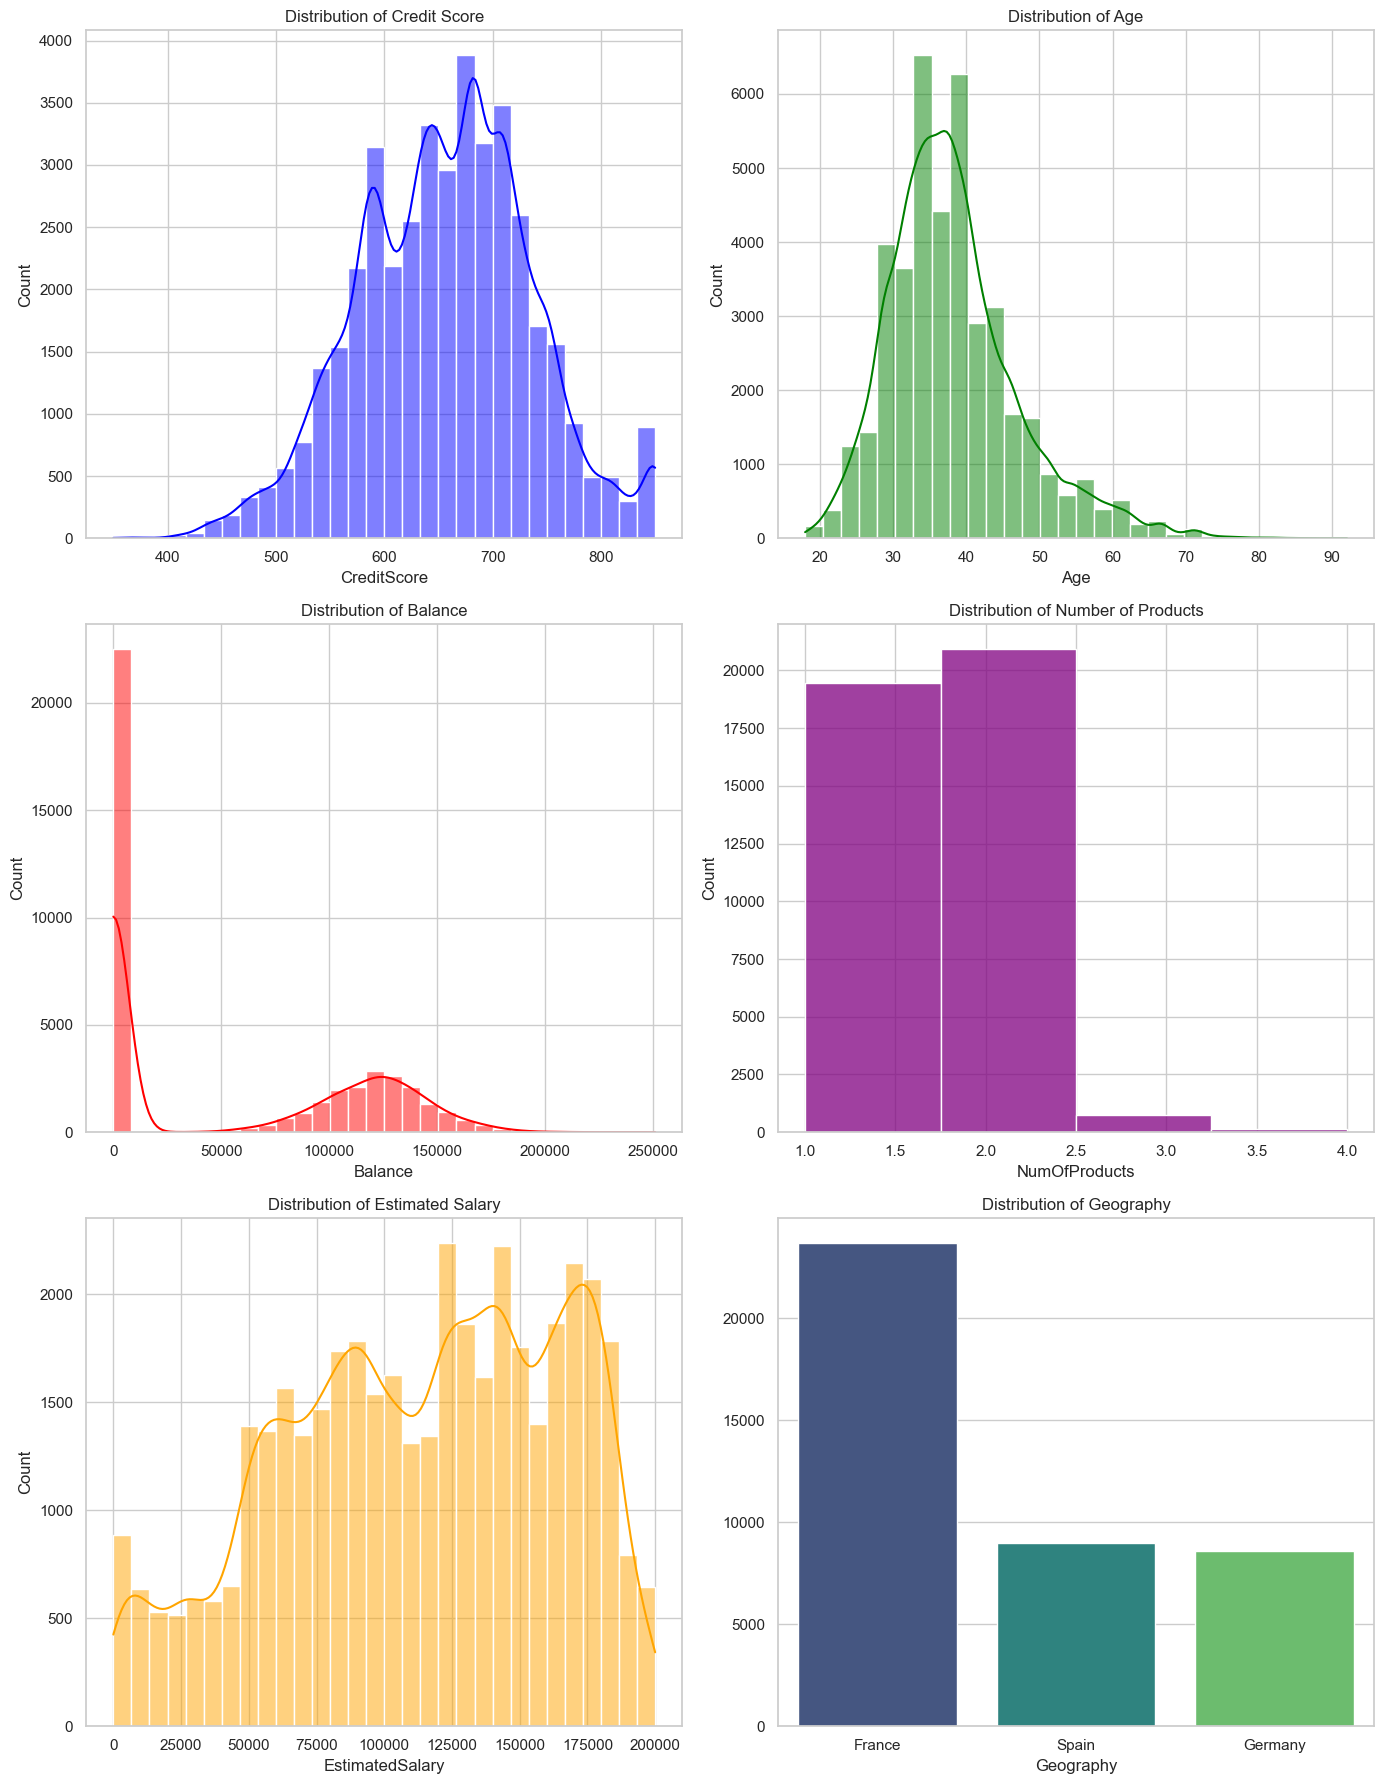

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for plots
sns.set(style="whitegrid")

# Create a figure to hold the plots
fig, ax = plt.subplots(3, 2, figsize=(14, 18))

# Plotting histograms for numerical variables
sns.histplot(data_cleaned['CreditScore'], bins=30, ax=ax[0, 0], kde=True, color='blue')
ax[0, 0].set_title('Distribution of Credit Score')

sns.histplot(data_cleaned['Age'], bins=30, ax=ax[0, 1], kde=True, color='green')
ax[0, 1].set_title('Distribution of Age')

sns.histplot(data_cleaned['Balance'], bins=30, ax=ax[1, 0], kde=True, color='red')
ax[1, 0].set_title('Distribution of Balance')

sns.histplot(data_cleaned['NumOfProducts'], bins=4, ax=ax[1, 1], kde=False, color='purple')
ax[1, 1].set_title('Distribution of Number of Products')

sns.histplot(data_cleaned['EstimatedSalary'], bins=30, ax=ax[2, 0], kde=True, color='orange')
ax[2, 0].set_title('Distribution of Estimated Salary')

# Plotting bar chart for categorical variables
geography_counts = data_cleaned['Geography'].value_counts()
gender_counts = data_cleaned['Gender'].value_counts()

sns.barplot(x=geography_counts.index, y=geography_counts.values, ax=ax[2, 1], palette='viridis')
ax[2, 1].set_title('Distribution of Geography')

# Adjust layout
plt.tight_layout()
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create a label encoder object
label_encoder = LabelEncoder()
data_cleaned['Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])

# One-hot encoding for 'Geography'
column_transformer = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), ['Geography'])],  # The column(s) to be transformed
    remainder='passthrough'                                # Leave the rest of the columns untouched
)

data_transformed = column_transformer.fit_transform(data_cleaned)
data_transformed = pd.DataFrame(data_transformed, columns=['Geography_France', 'Geography_Germany', 'Geography_Spain'] + [col for col in data_cleaned.columns if col != 'Geography'])

# Show the transformed data
data_transformed.head()


,Geography_France,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,1.0,0.0,0.0,850.0,1.0,42.0,5.0,0.00,2.0,1.0,1.0,105560.01,0.0
1,0.0,1.0,0.0,597.0,1.0,46.0,9.0,112291.06,2.0,1.0,1.0,47410.06,0.0
2,0.0,1.0,0.0,637.0,1.0,35.0,3.0,145974.79,2.0,1.0,0.0,180934.67,0.0
3,1.0,0.0,0.0,695.0,1.0,39.0,8.0,0.00,1.0,1.0,0.0,162669.73,0.0
4,1.0,0.0,0.0,695.0,0.0,29.0,0.0,109109.89,1.0,1.0,0.0,120770.80,0.0


## A. Membuat pemodelan dengan machine learning, dimana anda diminta untuk melakukan semua proses pre-processing data yang dibutuhkan sebelum pemodelan klasifikasi. Melakukan training machine learning dengan menbandingkan 2 algoritma Random Forest dan Xgboost dan memilih algoritma terbaik yang akan anda simpan dalam format pickle. Pastikan semua proses disertakan dalam file .ipynb termasuk classification report dari setiap model.

In [11]:
import pickle
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [12]:
!pip install xgboost

In [13]:
# Membagi data menjadi fitur X dan target y
X = data_transformed.drop(columns=['churn'])
y = data_transformed['churn']

In [14]:
# Membagi data menjadi fitur (X) dan target (y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33000, 12)
(8251, 12)
(33000,)
(8251,)


In [16]:
# membuat model Decission Tree
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Predict on the test set
y_pred = random_forest_model.predict(X_test)

In [18]:
# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.855896254999394


In [19]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      6543
         1.0       0.71      0.51      0.59      1708

    accuracy                           0.86      8251
   macro avg       0.80      0.73      0.75      8251
weighted avg       0.85      0.86      0.85      8251



In [20]:
# Save the trained model to a pickle file
model_filename = 'random_forest_churn_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(random_forest_model, file)

In [21]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(n_estimators=50, max_depth=3, random_state=42)

In [22]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [23]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)

In [24]:
# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8626833111138044


In [25]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      6543
         1.0       0.74      0.53      0.61      1708

    accuracy                           0.86      8251
   macro avg       0.81      0.74      0.76      8251
weighted avg       0.85      0.86      0.85      8251



In [26]:
# Save the trained model to a pickle file
model_filename = 'xgb_churn_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(random_forest_model, file)